In [1]:
from merge_sort import merge_sort
from insertion_sort import insertion_sort
from tim_sort import tim_sort
import time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy

In [2]:
def check_time(sorting_algo, input_arr, k=-1):
    start_time = time.time()
    if k!=-1:
        sorting_algo(input_arr, k)
    else:
        sorting_algo(input_arr)
    end_time = time.time()

    return (end_time - start_time)

In [3]:
def generate_int_arr(count=5, seed=0):
    np.random.seed(seed)
    return list(np.random.randint(low=0, high=count, size=count))

In [4]:
def generate_real_arr(count=5, seed=0):
    np.random.seed(seed)
    return list(np.random.uniform(low=0, high=count, size=count))

In [5]:
def experiment_transit(count, k_min, k_max, diff, seed=0):
    input_arr = generate_int_arr(count, seed)
    time_req = {
        "k": [],
        "time": []
    }

    min_idx = None
    min_val = np.inf

    for k in range(k_min, k_max, diff):
        input_arr_k = copy.deepcopy(input_arr)
        time_req["k"].append(k)
        time_sort = check_time(tim_sort, input_arr_k, k)
        time_req["time"].append(time_sort)

        if time_sort < min_val:
            min_idx = k
            min_val = time_sort

    plt.plot(time_req["k"], time_req["time"])
    plt.xlabel("k")
    plt.ylabel("Required Time (in s)")
    plt.title("Time required by Tim sort for different values of k")
    plt.annotate(f"k={min_idx}", (min_idx-5, min_val+0.005))
    plt.savefig(f"k_exp_seed_{seed}.jpg")

    plt.show()

    return min_idx

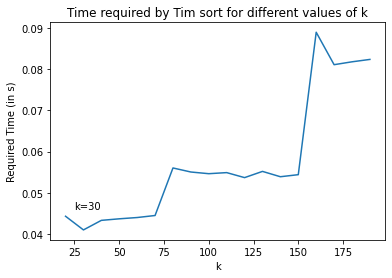

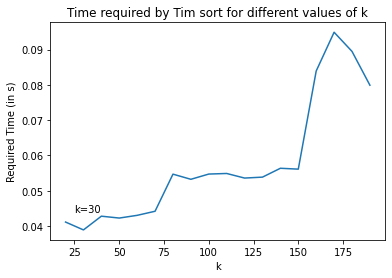

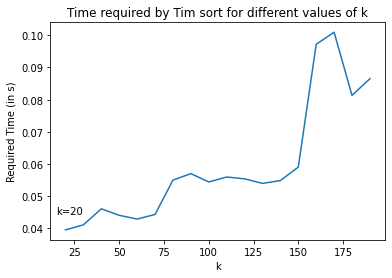

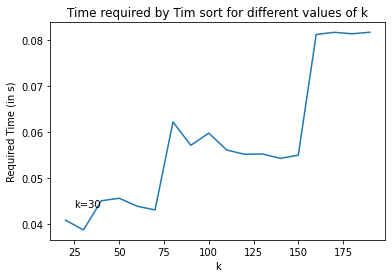

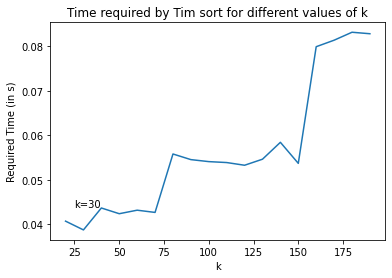

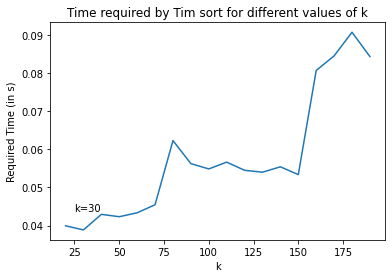

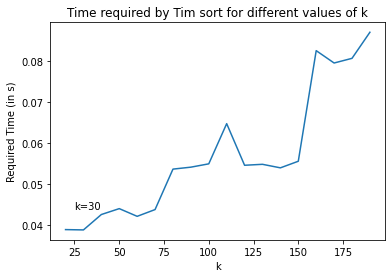

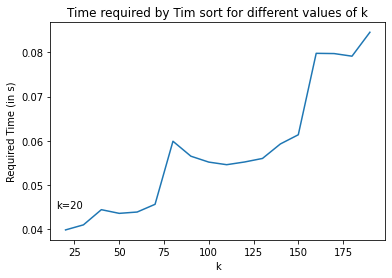

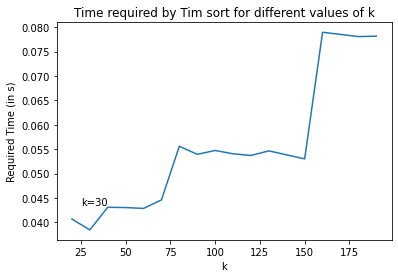

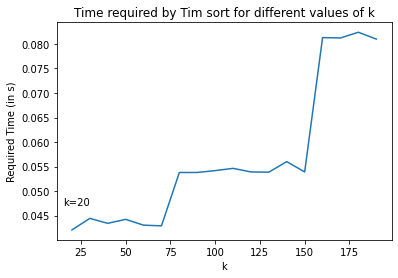

In [6]:
list_times = []

for i in range(10):
    list_times.append(experiment_transit(
        count = 10000,
        k_min = 20,
        k_max = 200,
        diff = 10,
        seed = i
    ))

{'whiskers': [<matplotlib.lines.Line2D at 0x10cbcf790>,
 'caps': [<matplotlib.lines.Line2D at 0x10cbcfa00>,
 'boxes': [<matplotlib.lines.Line2D at 0x10cbcff10>],
 'medians': [<matplotlib.lines.Line2D at 0x10cc4a850>],
 'fliers': [<matplotlib.lines.Line2D at 0x10cc4aaf0>],
 'means': []}

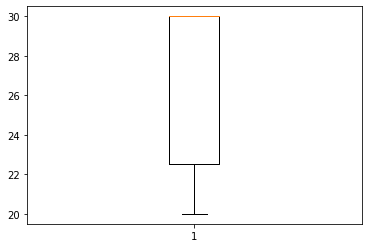

In [7]:
plt.boxplot(list_times)

In [8]:
k = 30

In [9]:
def experiment_time(min_input_size, max_input_size, dif=10, seed=0):
    time_plot = {
        "input_size": [],
        "merge": [],
        "insertion": [],
        "tim": []
    }

    for count in range(min_input_size, max_input_size, dif):
        input_arr = generate_int_arr(count, seed)
        input_arr_merge = copy.deepcopy(input_arr)
        input_arr_insertion = copy.deepcopy(input_arr)
        input_arr_tim = copy.deepcopy(input_arr)
        time_plot["input_size"].append(count)
        merge_time = check_time(merge_sort, input_arr_merge)
        insertion_time = check_time(insertion_sort, input_arr_insertion)
        tim_time = check_time(tim_sort, input_arr_tim, k)
        time_plot["merge"].append(merge_time)
        time_plot["insertion"].append(insertion_time)
        time_plot["tim"].append(tim_time)

    
    # for i in reversed(range(len(time_plot["input_size"]))):
    #     if(time_plot["merge"][i] > time_plot["insertion"][i]):
    #         inflection_n = time_plot["input_size"][i+1]
    #         inflection_time = time_plot["merge"][i+1]
    #         break
        
    plt.plot(time_plot["input_size"], time_plot["merge"], c="r", label="Merge Sort")
    plt.plot(time_plot["input_size"], time_plot["insertion"], c="b", label="Insertion Sort")
    plt.plot(time_plot["input_size"], time_plot["tim"], c="g", label="Tim Sort")
    plt.legend(loc="upper right")
    plt.xlabel("Number of elements (n)")
    plt.ylabel("Required time (in s)")
    plt.title("Merge Sort vs Insertion Sort vs Tim Sort")
    # plt.annotate(f"n={inflection_n}", (inflection_n-13, inflection_time + 0.0002))
    plt.savefig("Time_Requirement_Merge_Insertion_Tim.jpg")
    plt.show()

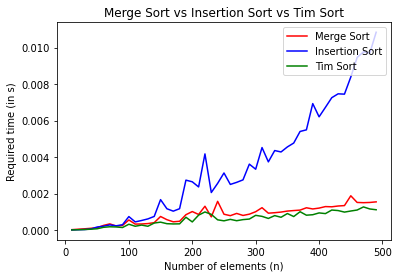

In [10]:
experiment_time(
    min_input_size=10,
    max_input_size=500,
    dif=10,
    seed=1
)